# Import libraries

In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib.request
import tarfile 
from PIL import Image
import sys
import PIL
import scipy
import tensorflow.keras


# Get class names

In [ ]:
class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Using the ONNX Model in OpenCV DNN

In [3]:
model=cv2.dnn.readNetFromONNX("model/flowers_converted.onnx")
print("Model loaded!!")

Model loaded!!


# Show the prediction image

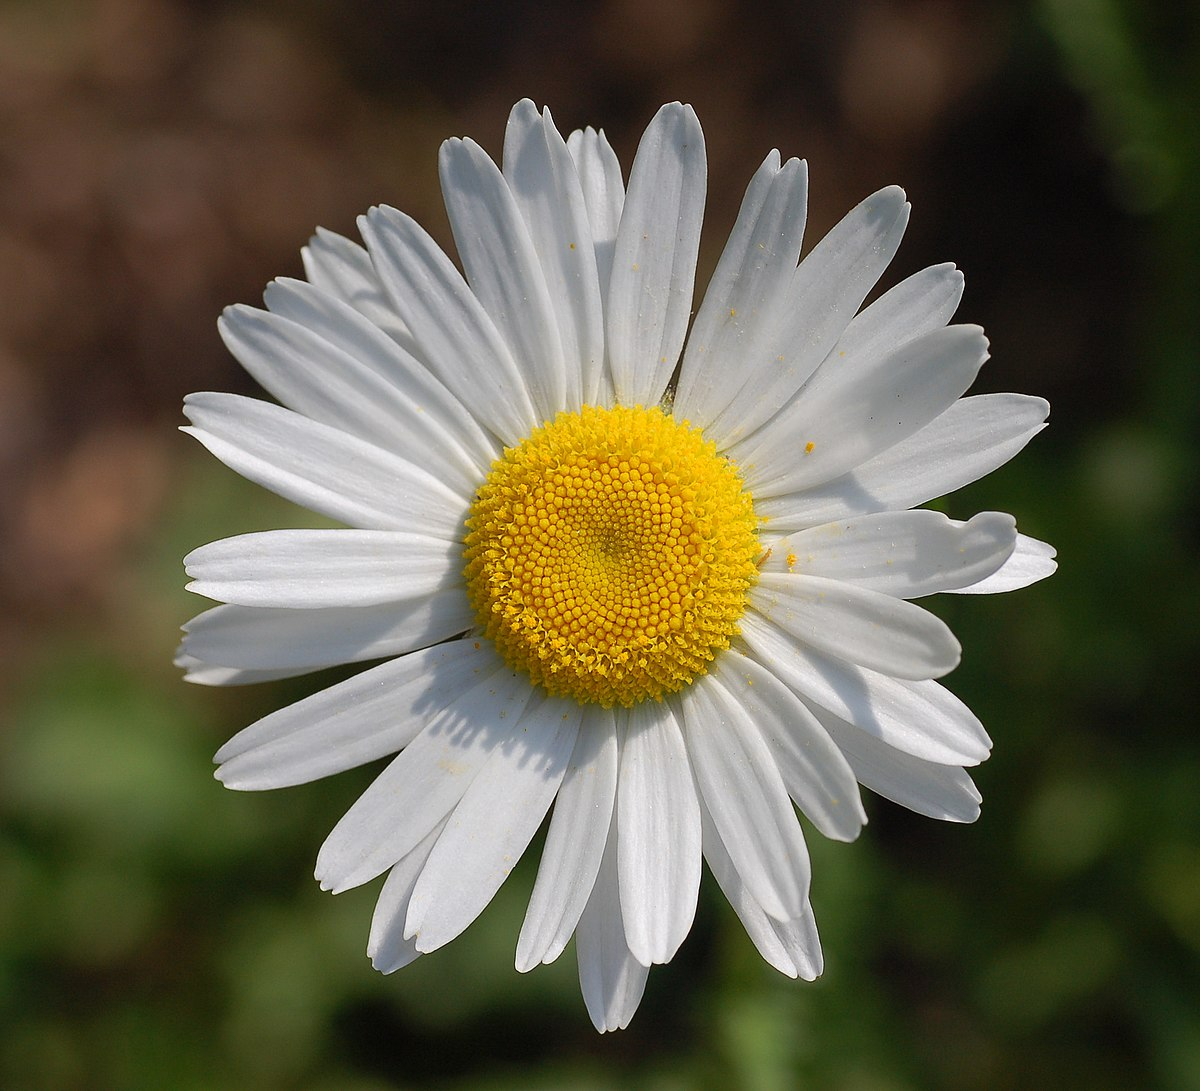

In [4]:
imgPIL=Image.open("daisy.jpg")
imgPIL

# Convert the image to 4-dim to feed the model 
# Prediction any image with ONNX-to-DNN Model

In [5]:
img=cv2.imread("daisy.jpg")
img=cv2.resize(img,(224,224))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=np.array(img).astype('float64')/255.0
img=np.expand_dims(img,axis=0)
print(img.shape)

(1, 224, 224, 3)


# Getting predicted results

In [9]:
# Take the img in model as input
model.setInput(img)

# Feed the model
output=model.forward()
print(output.shape)

(1, 5)


In [10]:
output

array([[9.5194596e-01, 1.1567506e-02, 1.9146711e-02, 2.7663459e-04,
        1.7063048e-02]], dtype=float32)

In [11]:
class_id=np.argmax(output[0])
class_name=class_names[int(class_id)]
probability=np.max(output[0])

print(f"Predicted class name with ONNX-to-DNN Model : {class_name} with {probability:.2f} of confidence.")

Predicted class name with ONNX-to-DNN Model : daisy with 0.95 of confidence.
